# **SPAM classification task**


The purpose of this lab is to build Machine & Deep Learning models at the interface of `NLP` and `Network Security` areas through the use of `SMS Spam Collection dataset` with helping frameworks & libraries.

After completing this lab, you will be able to:

1.  Quickly explore the SMS Spam Collection dataset and build the best models with the help of functional programming and layer-by-layer model description to solve a SPAM classification task.
2.  Show different calculated metrics of the built models.
3.  Change values of some hyperparameters for model training process improving to achieve better results.
4.  Visualize the data analysis results with various plot types.


## Agenda


*   Theory and Methods
*   General part
    *   Import required libraries and dataset
    *   Some additional & preparing actions & add functions
    *   Reading the Dataset
    *   Dataset manipulations & simple EDA
    *   Dataset size & feature names
    *   Dataset primary statistics
    *   Part A. Advanced Machine Learning for SPAM classification task
    *   Part B. Advanced Deep Learning for SPAM classification task
*   Author


***


## Theory and Methods


The basics of natural language processing (NLP)

The data that we are going to use for this is a subset of an open source default of `SMS Spam Collection dataset`, which contains SMS text examples and its corresponding labels (or tags: `Spam` and `Ham`). The file contains one message per line. Each line consists of two columns: v1 contains the label (`ham` or `spam`) and v2 contains the raw text.

This corpus has been collected from free or free for research sources on the Internet:

*   A collection of 425 SMS spam messages was manually extracted from the Grumbletext website. This is a UK forum where cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of spam messages texts in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext website is: [Web Link](http://www.grumbletext.co.uk/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01).
*   A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link](http://www.comp.nus.edu.sg/\~rpnlpir/downloads/corpora/smsCorpus/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01).
*   A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis is available at [Web Link](http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01).
*   Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link](http://www.esp.uem.es/jmgomez/smsspamcorpus/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01).

The original dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01). The creators would like to note that in case you find the dataset useful, please, make a reference to the previous paper and the [web page](http://www.dt.fee.unicamp.br/\~tiago/smsspamcollection/) in your papers, research, etc.

This work presents a number of statistics, studies and baseline results for a few machine learning methods.

***

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study  of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

***

In addition, we will build a visualization of our results, specifically the obtained metrics (accuracy and loss), to choose the best model for further saving and forecasting based on this saved model.


## Import required libraries and dataset


Import the necessary libraries to use in this lab. We can add some aliases (such as pd, plt, np, tf) to make the libraries easier to use in our code and set a default figure size for further plots. Ignore the warnings.


In [3]:
!pip install nltk
!pip install wordcloud
!pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import nltk, re, collections, pickle, os # nltk - Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# %matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')
seed = 42

import warnings
warnings.filterwarnings(action = "ignore")
warnings.simplefilter(action = 'ignore', category = Warning)
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Some additional & preparing actions & add functions


Specify the value of the `precision` parameter equal to 3 to display three decimal signs (instead of 6 as default).


In [ ]:
pd.set_option("precision", 3)
pd.options.display.float_format = '{:.3f}'.format

Add some functions that you will need futher.


In [6]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' in s]

    plt.figure(figsize = (12, 5), dpi = 100)
    COLOR = 'gray'

    plt.rc('legend', fontsize = 14)   # legend fontsize
    plt.rc('figure', titlesize = 12)  # fontsize of the figure title

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return

    ## As loss always exists
    epochs = range(1, len(history.history[loss_list[0]]) + 1)

    ## Loss
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace = 2, hspace = 2)
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.titlecolor'] = 'black'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b-o',
                 label = 'Train (' + str(str(format(history.history[l][-1],'.4f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g',
                 label = 'Valid (' + str(str(format(history.history[l][-1],'.4f'))+')'))

    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend(facecolor = 'gray', loc = 'best')
    plt.grid(True)
    plt.tight_layout()

    ## Accuracy
    plt.subplot(1, 2, 2)
    plt.subplots_adjust(wspace = 2, hspace = 2)
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.titlecolor'] = 'black'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b-o',
                 label = 'Train (' + str(format(history.history[l][-1],'.4f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, history.history[l], 'g',
                 label = 'Valid (' + str(format(history.history[l][-1],'.4f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(facecolor = 'gray', loc = 'best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_conf_matr(conf_matr, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.winter):
  """
  Citation
  ---------
  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

  """
  import itertools

  accuracy = np.trace(conf_matr) / np.sum(conf_matr).astype('float')
  sns.set(font_scale = 1.4)

  plt.figure(figsize = (12, 8))
  plt.imshow(conf_matr, interpolation = 'nearest', cmap = cmap)
  title = '\n' + title + '\n'
  plt.title(title)
  plt.colorbar()

  if classes is not None:
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation = 45)
      plt.yticks(tick_marks, classes)

  if normalize:
      conf_matr = conf_matr.astype('float') / conf_matr.sum(axis = 1)[:, np.newaxis]


  thresh = conf_matr.max() / 1.5 if normalize else conf_matr.max() / 2
  for i, j in itertools.product(range(conf_matr.shape[0]), range(conf_matr.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.2f}%".format(conf_matr[i, j] * 100),
                    horizontalalignment = "center",
                    fontweight = 'bold',
                    color = "white" if conf_matr[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(conf_matr[i, j]),
                    horizontalalignment = "center",
                    fontweight = 'bold',
                    color = "white" if conf_matr[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\n\nAccuracy = {:0.2f}%; Error = {:0.2f}%'.format(accuracy * 100, (1 - accuracy) * 100))
  plt.show()


def plot_words(set, number):
  words_counter = collections.Counter([word for sentence in set for word in sentence.split()]) # finding words along with count
  most_counted = words_counter.most_common(number)
  most_count = pd.DataFrame(most_counted, columns = ["Words", "Amount"]).sort_values(by = "Amount") # sorted data frame
  most_count.plot.barh(x = "Words",
                       y = "Amount",
                       color = "blue",
                       figsize = (10, 15))
  for i, v in enumerate(most_count["Amount"]):
    plt.text(v, i,
             " " + str(v),
             color = 'black',
             va = 'center',
             fontweight = 'bold')

def word_cloud(tag):
  df_words_nl = ' '.join(list(df_spam[df_spam['feature'] == tag]['message']))
  df_wc_nl = WordCloud(width = 600, height = 512).generate(df_words_nl)
  plt.figure(figsize = (13, 9), facecolor = 'k')
  plt.imshow(df_wc_nl)
  plt.axis('off')
  plt.tight_layout(pad = 1)
  plt.show()

## Reading the Dataset


The files contain one message per line. Each line consists of two columns: v1 contains the label (`ham` or `spam`) and v2 contains the raw text. SMS spam (sometimes called cell phone spam) is any junk message delivered to a mobile phone as a text messaging through the Short Message Service (SMS). The practice is fairly rare in `North America` but has been common in `Japan` for years.

***

In this section you will read our dataset.


In [7]:
df_spam = pd.read_csv('spam.csv', encoding = 'latin-1')

## Dataset manipulations & simple EDA


To make the columns(v1, v2) easy to read, we can rename them respectively.


In [8]:
df_spam = df_spam.filter(['v1', 'v2'], axis = 1)
df_spam.columns = ['feature', 'message']
df_spam.drop_duplicates(inplace = True, ignore_index = True)
print('Number of null values:\n')
df_spam.isnull().sum()

Number of null values:



feature    0
message    0
dtype: int64

Total ham(0) and spam(1) messages.


In [9]:
df_spam['feature'].value_counts()

feature
ham     4516
spam     653
Name: count, dtype: int64

## Dataset size & feature names


In [10]:
df_spam.shape, df_spam.columns

((5169, 2), Index(['feature', 'message'], dtype='object'))

The dataset contains a lot of objects (rows), including 1 target feature (`feature`) and an additional column (`message`).


Input features (column names):

1.  `feature` - tags in this data collection
2.  `message` - raw test message example


Let's describe the data in a transposed way using both `describe` & `T` methods. The number of statistical output parameters from the data set is determined by the `describe` method.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [11]:
df_spam.describe().T

,count,unique,top,freq
feature,5169,2,ham,4516
message,5169,5169,Rofl. Its true to its name,1


## Dataset primary statistics


Let’s plot the number of value of both `spam` and `ham` messages.


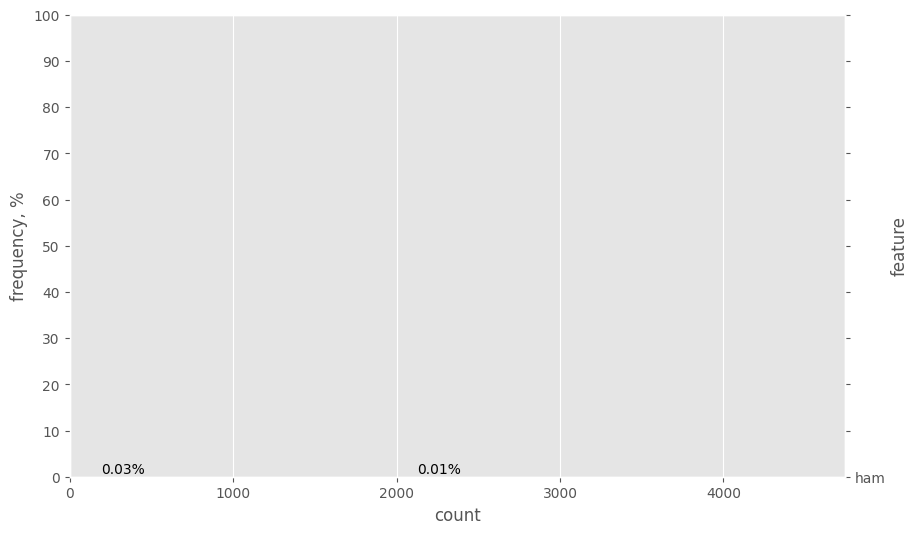

In [12]:
plt.figure(figsize = (10, 6))
counter = df_spam.shape[0]
ax1 = sns.countplot(df_spam['feature'])
ax2 = ax1.twinx()                      # Make double axis
ax2.yaxis.tick_left()                 # Switch so the counter's axis is on the right, frequency axis is on the left
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')  # Also switch the labels over
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('frequency, %')


for p in ax1.patches:
  x = p.get_bbox().get_points()[:, 0]
  y = p.get_bbox().get_points()[1, 1]
  ax1.annotate('{:.2f}%'.format(100. * y / counter),
              (x.mean(), y),
              ha = 'center',
              va = 'bottom')

# Use a LinearLocator to ensure the correct number of ticks
ax1.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0, 100)
ax1.set_ylim(0, counter)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

The number of `ham` messages is almost for times bigger than that of `spam` messages in the data.

Let’s plot the `number` (you can choose a number of words yourself in the range of `[5 .. 50]` (it should be divisible by `5`)) of different most often used words (while we can name these objects as words) present in our dataset.


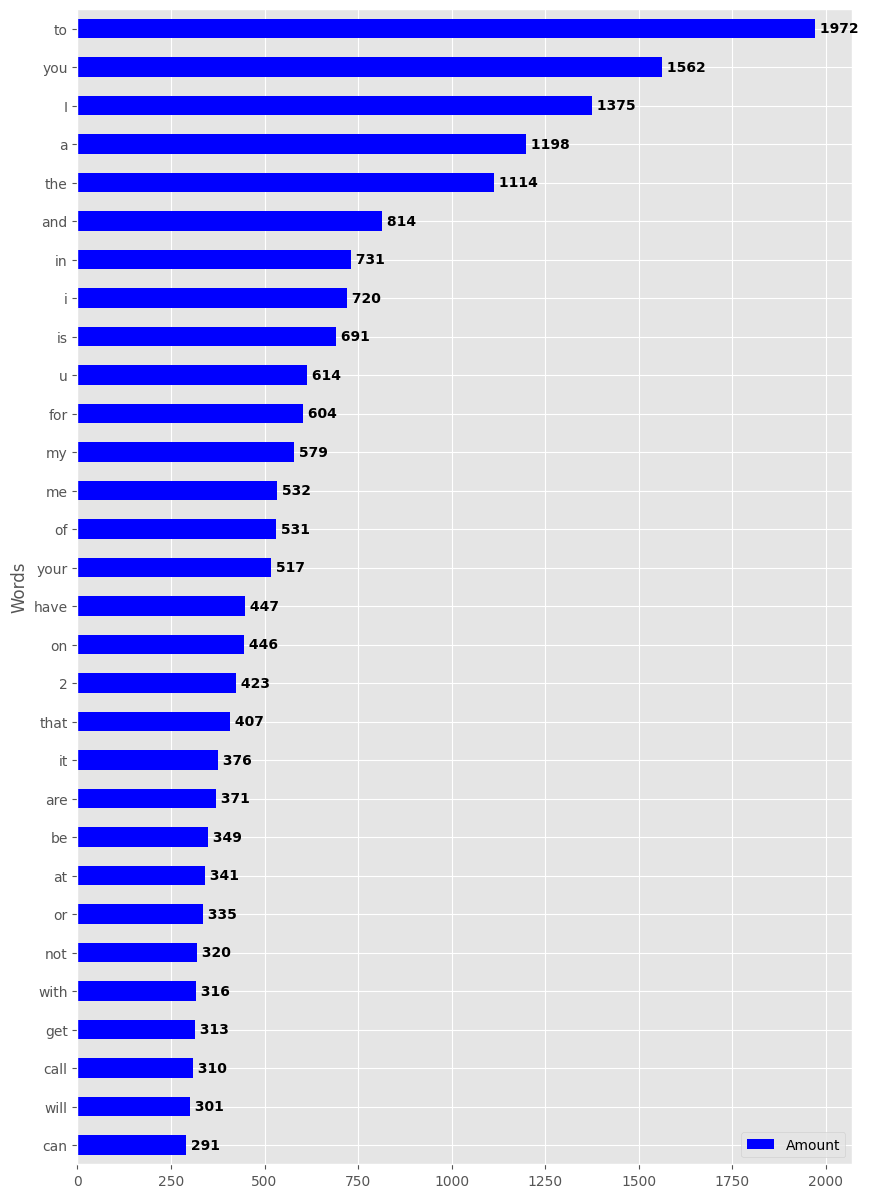

In [13]:
plot_words(df_spam['message'], number = 30)

As you can see, the most often used words are `stopwords`. So we need to perform some preprocessing techniques on the dataset (see below [lemmatization](https://en.wikipedia.org/wiki/Lemmatisation?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01) substep in `Stage I`).

Let's build the `WordCloud` image for the `spam` and the existed words (label `ham`) separately.


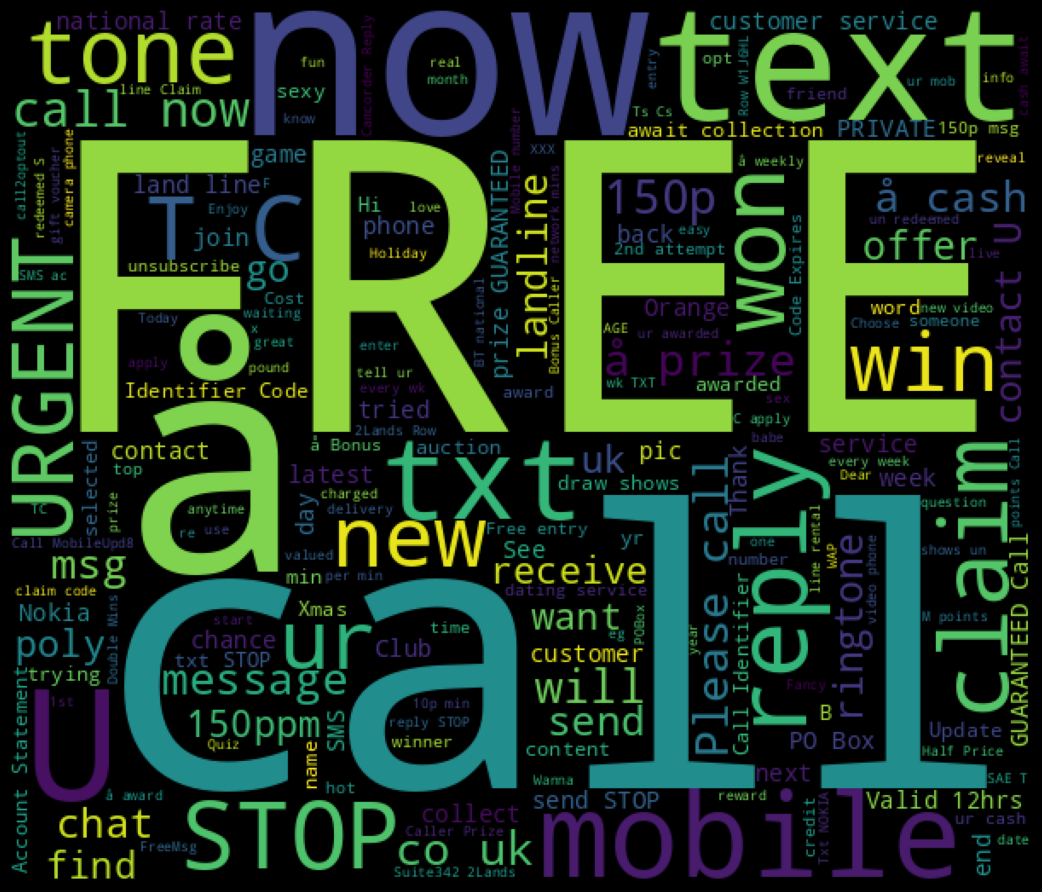

In [14]:
word_cloud('spam')

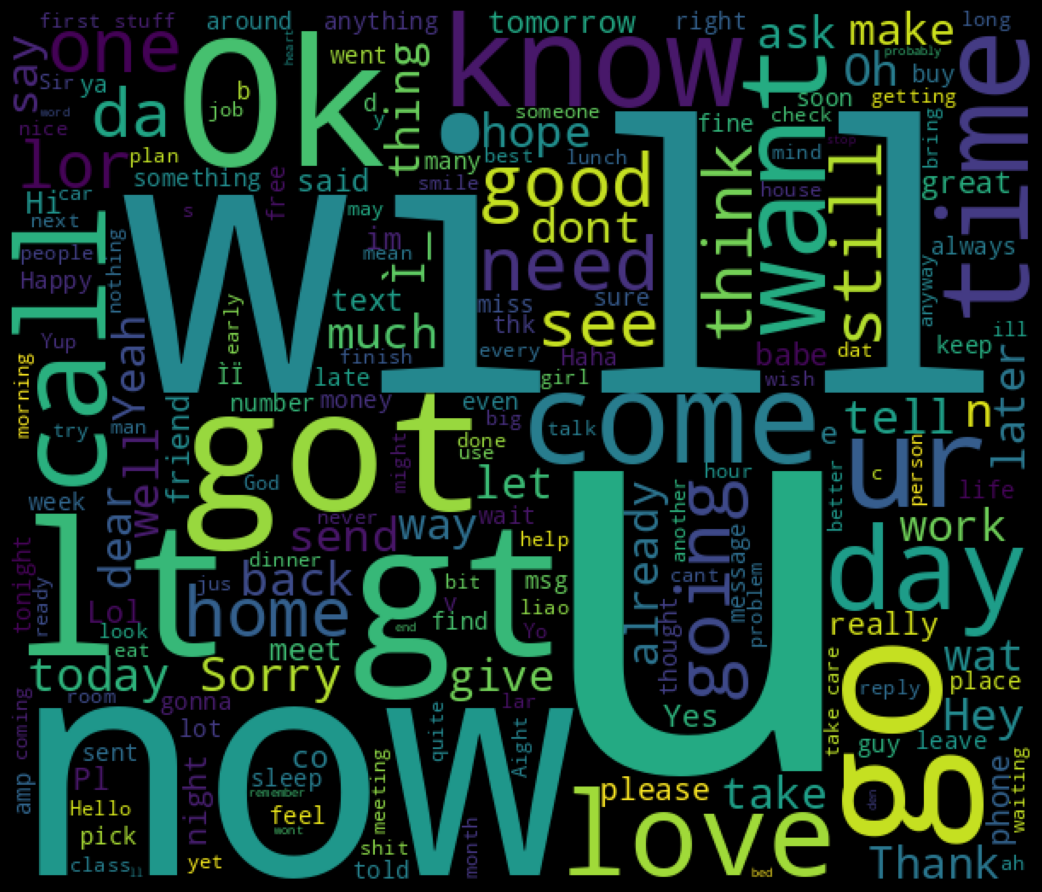

In [15]:
word_cloud('ham')

## Part A. Advanced Machine Learning for SPAM classification task


### I stage. Preliminary actions. Preparing of needed sets.


We need to define some input parameters for our next research, such as the `size of vocabulary`, sizes of `test` & `validation` sets, `dropping level`, etc. You can change some of those numerical parameters yourself (only where you can see the additional comments).


In [16]:
size_vocabulary = 1000    # You can choose the size of vocabulary yourself in the range [500 .. 1500] (it should be divisible by 500)
embedding_dimension = 64  # You can choose the size of dimention yourself in the range [32 .. 256] (it should be divisible by 32)
trunc_type = 'post'
padding_type = 'post'
threshold = 0.5           # You can choose the size of threshold yourself in the range [0 .. 1]
oov_token = "<OOV>"
test_size, valid_size = 0.05, 0.2
num_epochs = 20           # You can choose the number of epochs yourself in the range [20 .. 50] (it should be divisible by 5)
drop_level = 0.3          # You can choose the size of drop level yourself in the range [0 .. 1]

Next actions allow you to make data cleaning step by step, which consists of the following replace rules:

1.  email addresses with 'emailaddr';
2.  URLs with 'httpaddr';
3.  money symbols with 'moneysymb';
4.  phone numbers with 'phonenumbr';
5.  numbers with 'numbr';
6.  remove all punctuations;
7.  word to lower case.

Moreover, we make a `lemmatization` which is a method of morphological analysis. It comes down to reducing a word form to its initial dictionary form (lemma). As a result of  word forms lemmatization, flexive endings are discarded and the main or dictionary form of the word is returned.


In [17]:
print("\t\tStage I. Preliminary actions. Preparing of needed sets\n")
full_df_l = []
lemmatizer = WordNetLemmatizer()
for i in range(df_spam.shape[0]):
    mess_1 = df_spam.iloc[i, 1]
    mess_1 = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', mess_1)
    mess_1 = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', mess_1)
    mess_1 = re.sub('£|\$', 'moneysymb', mess_1)
    mess_1 = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', mess_1)
    mess_1 = re.sub('\d+(\.\d+)?', 'numbr', mess_1)
    mess_1 = re.sub('[^\w\d\s]', ' ', mess_1)
    mess_1 = re.sub('[^A-Za-z]', ' ', mess_1).lower()
    token_messages = word_tokenize(mess_1)
    mess = []
    for word in token_messages:
        if word not in set(stopwords.words('english')):
            mess.append(lemmatizer.lemmatize(word))
    txt_mess = " ".join(mess)
    full_df_l.append(txt_mess)

		Stage I. Preliminary actions. Preparing of needed sets



Now, let’s plot the count words (`number` - you can choose a number of words yourself in the range `[5 .. 50]` (it should be divisible by `5`)) once again to see the most frequent words (without any stopwords, thus after all cleaning stages).


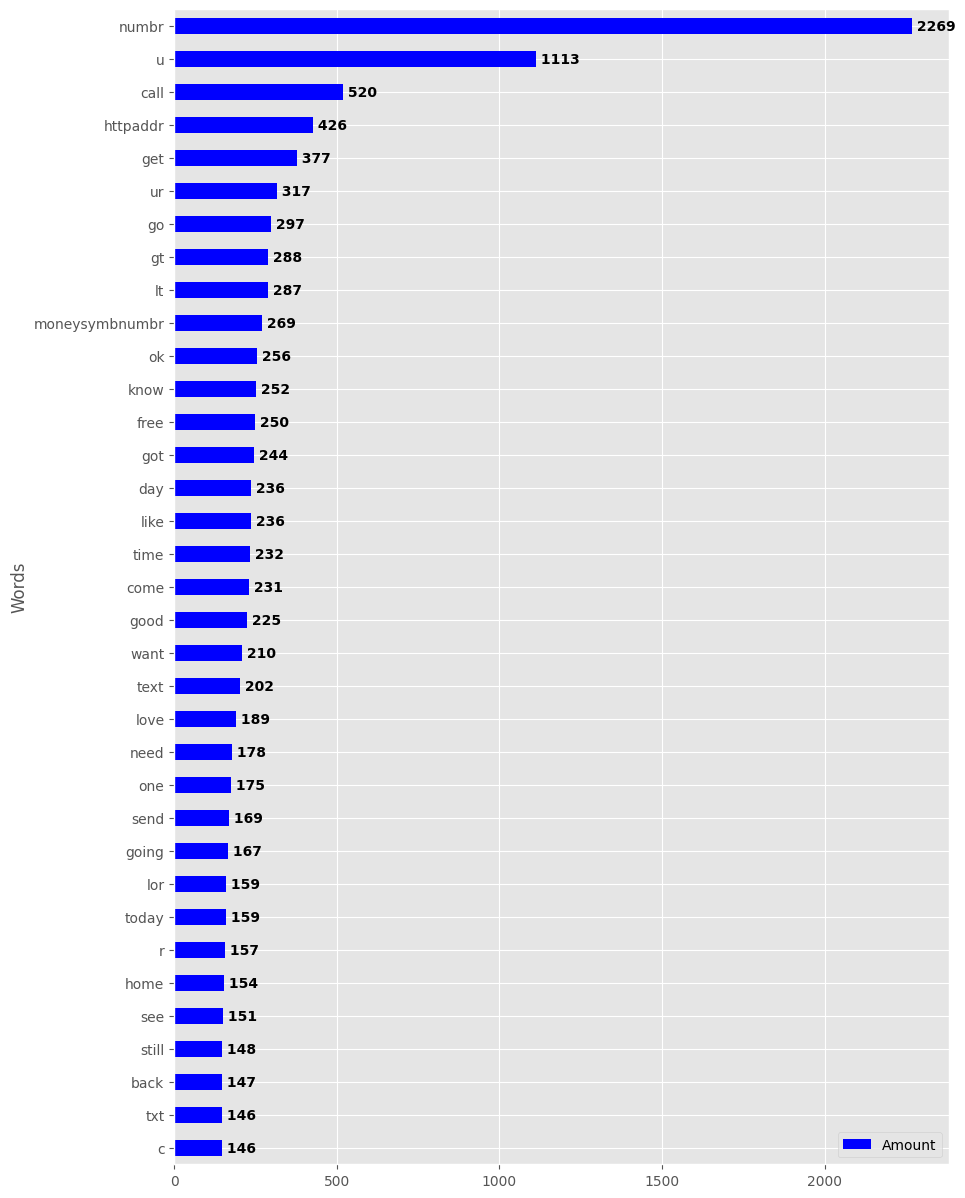

In [18]:
plot_words(full_df_l, number = 35)

We can see that most common words are different from the stopwords. In addition, you can compare this picture with the result in the chapter `"Dataset primary statistics"`.

Then the primary `df_spam` set will split into sentences (messages) and labels separately. Then we will split the full primary `df_spam` set with the following proportions: a training set (`75%`) and a test set (`25%`). Thus we will obtain 4 sets: two for sentences and two for labels with the same proportions.

Also, we will do the `vectorization` with the help of `CountVectorizer` method. This is an easy way to make a collection of text documents and create a dictionary of famous words. This method converts the input text to the matrix, the values of which are the numbers of this key entry (words) in the text. Unfortunately, `FeatureHasher` has more configurable parameters (for example, you can set the tokenizer), but it works slowlier.


In [19]:
add_df = CountVectorizer(max_features = size_vocabulary)
X = add_df.fit_transform(full_df_l).toarray()
y = df_spam.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (test_size + valid_size), random_state = seed)
print('Number of rows in test set: ' + str(X_test.shape))
print('Number of rows in training set: ' + str(X_train.shape))

Number of rows in test set: (1293, 1000)
Number of rows in training set: (3876, 1000)


### II stage. Naive Bayes Classifier.


Let's find a set of predictions based on our models: `Guassian Naive Bayes` and `Multinomial Naive Bayes`. In addition, we will build a `classification report` and draw the `confusion matrix`.


		Stage IIa. Guassian Naive Bayes

The first two predicted labels: spam ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.99      0.77      0.86      1107
        spam       0.41      0.94      0.57       186

    accuracy                           0.79      1293
   macro avg       0.70      0.85      0.72      1293
weighted avg       0.90      0.79      0.82      1293
 



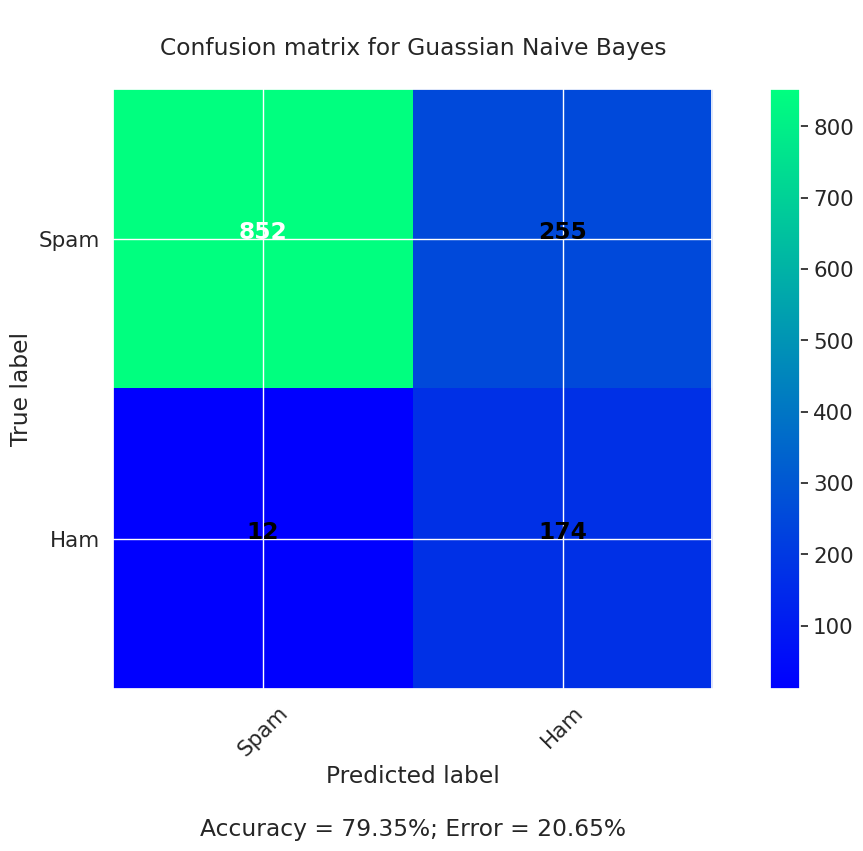

In [20]:
print("\t\tStage IIa. Guassian Naive Bayes\n")
class_NBC = GaussianNB().fit(X_train, y_train) # Guassian Naive Bayes
y_pred_NBC = class_NBC.predict(X_test)
print('The first two predicted labels:', y_pred_NBC[0],y_pred_NBC[1], '\n')
conf_m_NBC = confusion_matrix(y_test, y_pred_NBC)
class_rep_NBC = classification_report(y_test, y_pred_NBC)
print('\t\t\tClassification report:\n\n', class_rep_NBC, '\n')
plot_conf_matr(conf_m_NBC, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for Guassian Naive Bayes')

		Stage IIb. Multinomial Naive Bayes

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.99      0.98      0.98      1107
        spam       0.90      0.92      0.91       186

    accuracy                           0.97      1293
   macro avg       0.94      0.95      0.95      1293
weighted avg       0.97      0.97      0.97      1293
 



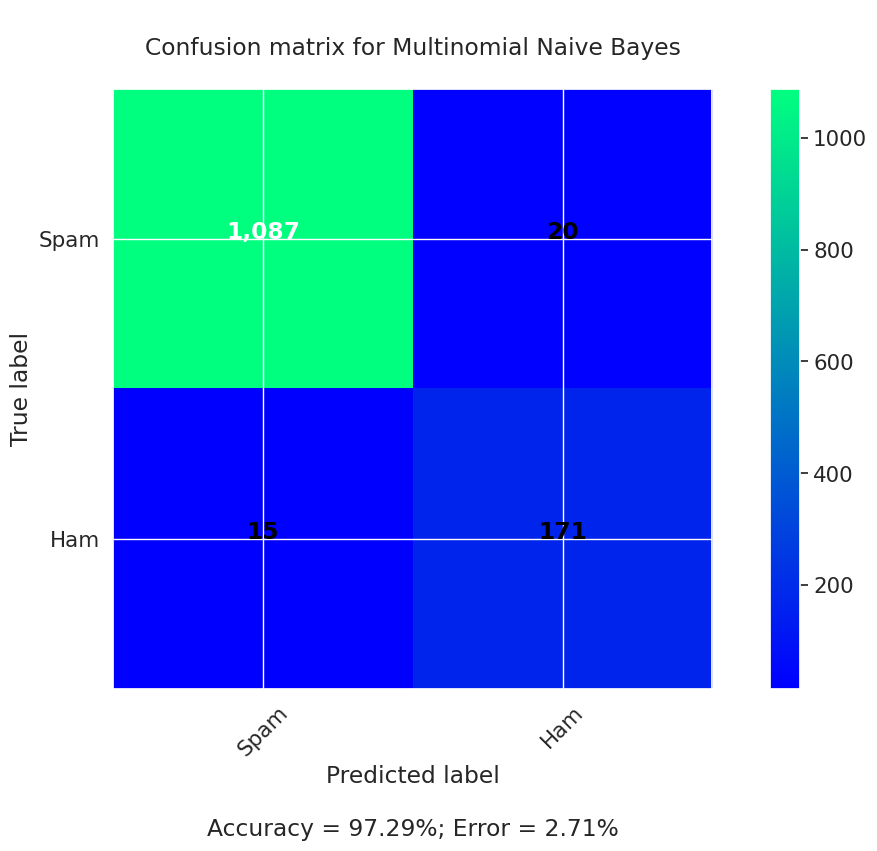

In [21]:
print("\t\tStage IIb. Multinomial Naive Bayes\n")
class_MNB = MultinomialNB().fit(X_train, y_train) # Multinomial Naive Bayes
y_pred_MNB = class_MNB.predict(X_test)
print('The first two predicted labels:', y_pred_MNB[0],y_pred_MNB[1], '\n')
conf_m_MNB = confusion_matrix(y_test, y_pred_MNB)
class_rep_MNB = classification_report(y_test, y_pred_MNB)
print('\t\t\tClassification report:\n\n', class_rep_MNB, '\n')
plot_conf_matr(conf_m_MNB, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for Multinomial Naive Bayes')

### III stage. Decision Tree Classifier.


Let's find a set of predictions based on our `Decision Tree Classifier` model. In addition, we will build a `classification report` and draw the `confusion matrix`.


		Stage III. Decision Tree Classifier

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1107
        spam       0.88      0.84      0.86       186

    accuracy                           0.96      1293
   macro avg       0.93      0.91      0.92      1293
weighted avg       0.96      0.96      0.96      1293
 



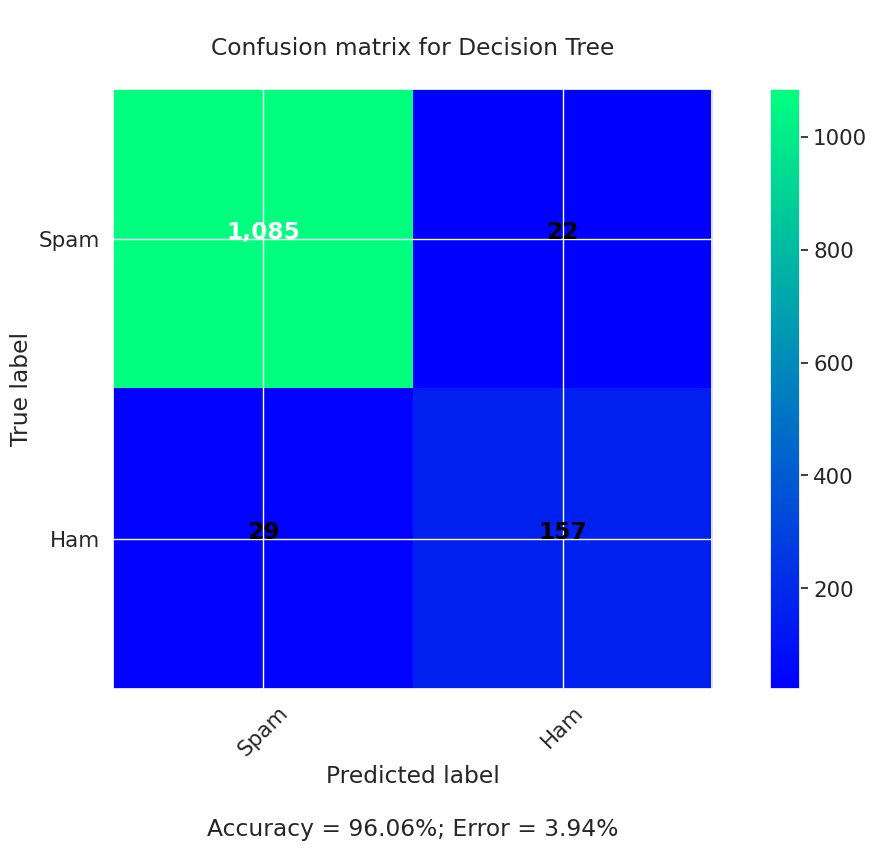

In [22]:
print("\t\tStage III. Decision Tree Classifier\n")
class_DTC = DecisionTreeClassifier(random_state = seed).fit(X_train, y_train)
y_pred_DTC = class_DTC.predict(X_test)
print('The first two predicted labels:', y_pred_DTC[0], y_pred_DTC[1], '\n')
conf_m_DTC = confusion_matrix(y_test, y_pred_DTC)
class_rep_DTC = classification_report(y_test, y_pred_DTC)
print('\t\t\tClassification report:\n\n', class_rep_DTC, '\n')
plot_conf_matr(conf_m_DTC, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for Decision Tree')

### IV stage. Logistic Regression.


Let's find a set of predictions based on our `Logistic Regression` model. In addition, we will build a `classification report` and draw the `confusion matrix`.


		Stage IV. Logistic Regression

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1107
        spam       0.97      0.86      0.91       186

    accuracy                           0.98      1293
   macro avg       0.97      0.93      0.95      1293
weighted avg       0.98      0.98      0.98      1293
 



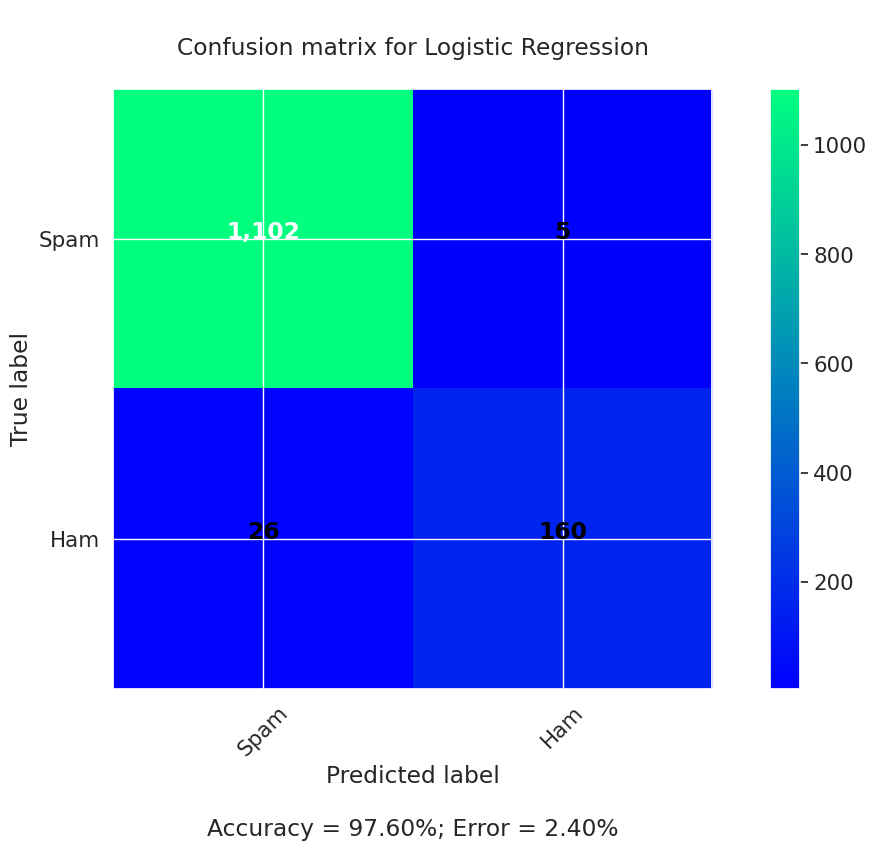

In [23]:
print("\t\tStage IV. Logistic Regression\n")
class_LR = LogisticRegression(random_state = seed, solver = 'liblinear').fit(X_train, y_train)
y_pred_LR = class_LR.predict(X_test)
print('The first two predicted labels:', y_pred_LR[0], y_pred_LR[1], '\n')
conf_m_LR = confusion_matrix(y_test, y_pred_LR)
class_rep_LR = classification_report(y_test, y_pred_LR)
print('\t\t\tClassification report:\n\n', class_rep_LR, '\n')
plot_conf_matr(conf_m_LR, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for Logistic Regression')

### V stage. KNeighbors Classifier.


Let's find a set of predictions based on our `KNeighbors Classifier` model. In addition, we will build a `classification report` and draw the `confusion matrix`.


		Stage V. KNeighbors Classifier

The firs two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.95      0.99      0.97      1107
        spam       0.93      0.69      0.79       186

    accuracy                           0.95      1293
   macro avg       0.94      0.84      0.88      1293
weighted avg       0.95      0.95      0.94      1293
 



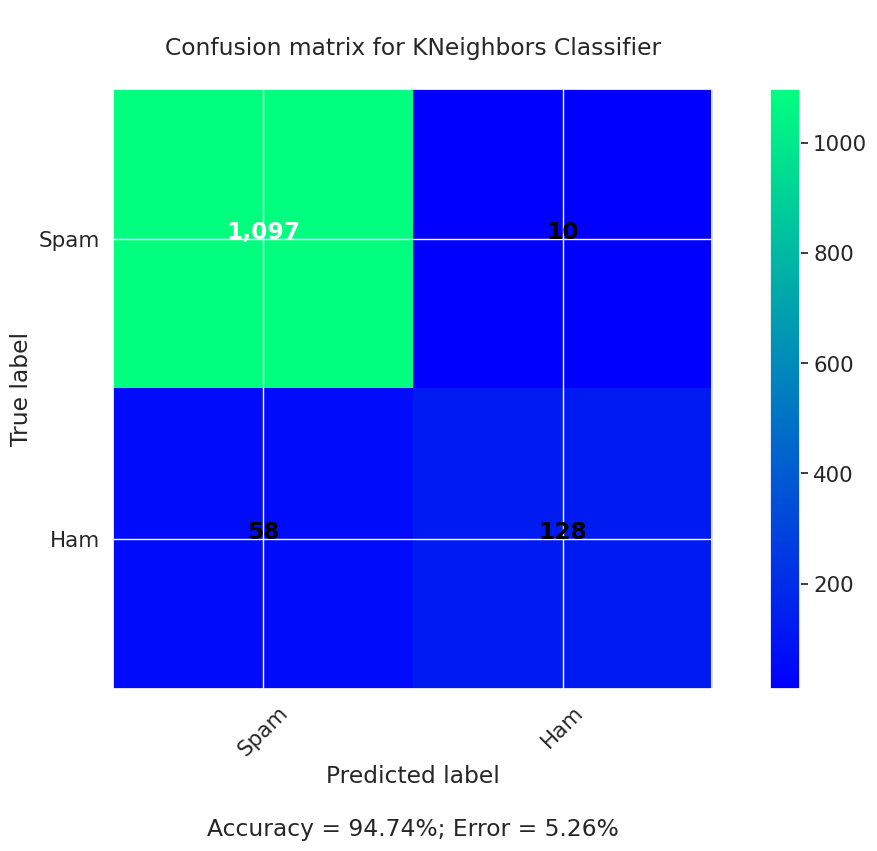

In [24]:
print("\t\tStage V. KNeighbors Classifier\n")
class_KNC = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
y_pred_KNC = class_KNC.predict(X_test)
print('The firs two predicted labels:', y_pred_KNC[0], y_pred_KNC[1], '\n')
conf_m_KNC = confusion_matrix(y_test, y_pred_KNC)
class_rep_KNC = classification_report(y_test, y_pred_KNC)
print('\t\t\tClassification report:\n\n', class_rep_KNC, '\n')
plot_conf_matr(conf_m_KNC, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for KNeighbors Classifier')

### VI stage. Support Vector Classification.


Let's find a set of predictions based on our `Support Vector Classification` model. In addition, we will build a `classification report` and draw the `confusion matrix`.


		Stage VI. Support Vector Classification

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1107
        spam       0.98      0.85      0.91       186

    accuracy                           0.98      1293
   macro avg       0.98      0.93      0.95      1293
weighted avg       0.98      0.98      0.98      1293
 



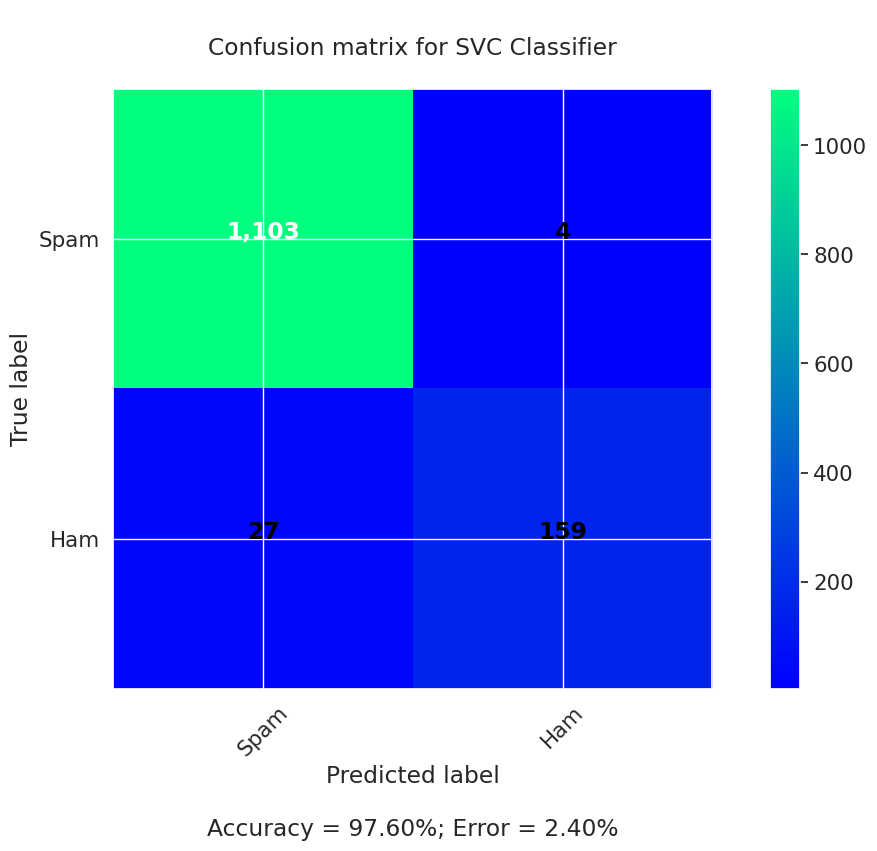

In [25]:
print("\t\tStage VI. Support Vector Classification\n")
class_SVC = SVC(probability = True, random_state = seed).fit(X_train, y_train)
y_pred_SVC = class_SVC.predict(X_test)
print('The first two predicted labels:', y_pred_SVC[0], y_pred_SVC[1], '\n')
conf_m_SVC = confusion_matrix(y_test, y_pred_SVC)
class_rep_SVC = classification_report(y_test, y_pred_SVC)
print('\t\t\tClassification report:\n\n', class_rep_SVC, '\n')
plot_conf_matr(conf_m_SVC, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for SVC Classifier')

### VII stage. Gradient Boosting Classifier.


Let's find a set of predictions based on our `Gradient Boosting Classifier` model. In addition, we will build a `classification report` and draw the `confusion matrix`.


		Stage VII. Gradient Boosting Classifier

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1107
        spam       0.99      0.83      0.90       186

    accuracy                           0.97      1293
   macro avg       0.98      0.92      0.94      1293
weighted avg       0.97      0.97      0.97      1293
 



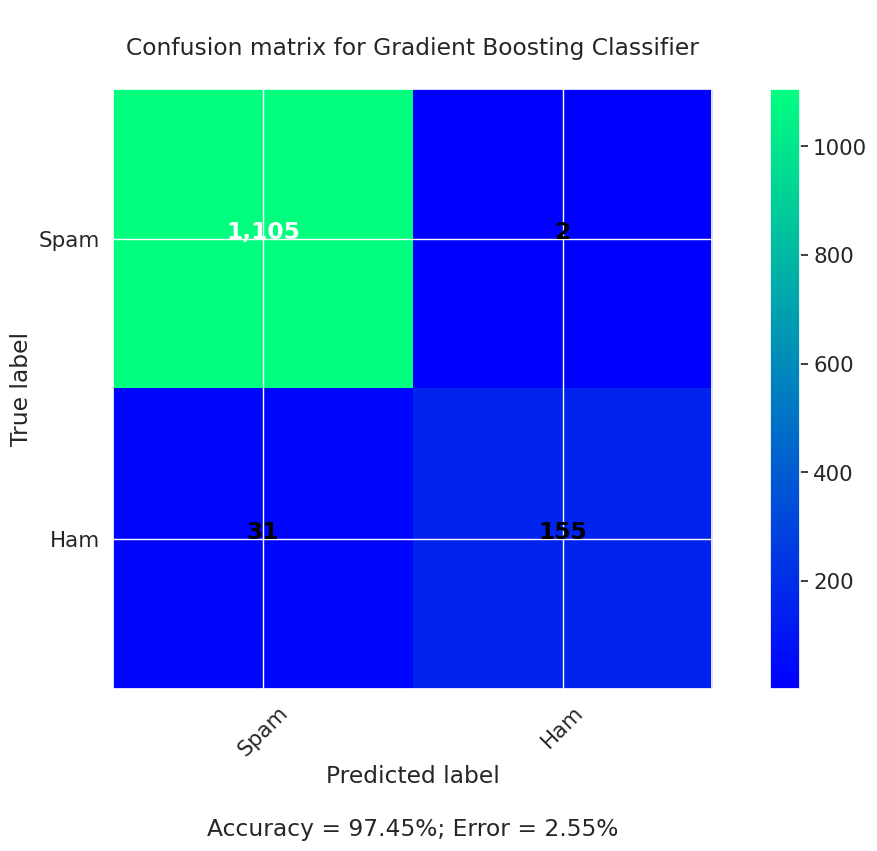

In [26]:
print("\t\tStage VII. Gradient Boosting Classifier\n")
class_GBC = GradientBoostingClassifier(random_state = seed).fit(X_train, y_train)
y_pred_GBC = class_GBC.predict(X_test)
print('The first two predicted labels:', y_pred_GBC[0], y_pred_GBC[1], '\n')
conf_m_GBC = confusion_matrix(y_test, y_pred_GBC)
class_rep_GBC = classification_report(y_test, y_pred_GBC)
print('\t\t\tClassification report:\n\n', class_rep_GBC, '\n')
plot_conf_matr(conf_m_GBC, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for Gradient Boosting Classifier')

### VIII stage. Bagging Classifier.


Let's find a set of predictions based on our `Bagging Classifier` model. In addition, we will build a `classification report` and draw the `confusion matrix`.

Replace `##YOUR CODE GOES HERE##` with your Python code.


		Stage VIII. Bagging Classifier + something else

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1107
        spam       0.96      0.88      0.92       186

    accuracy                           0.98      1293
   macro avg       0.97      0.94      0.95      1293
weighted avg       0.98      0.98      0.98      1293
 



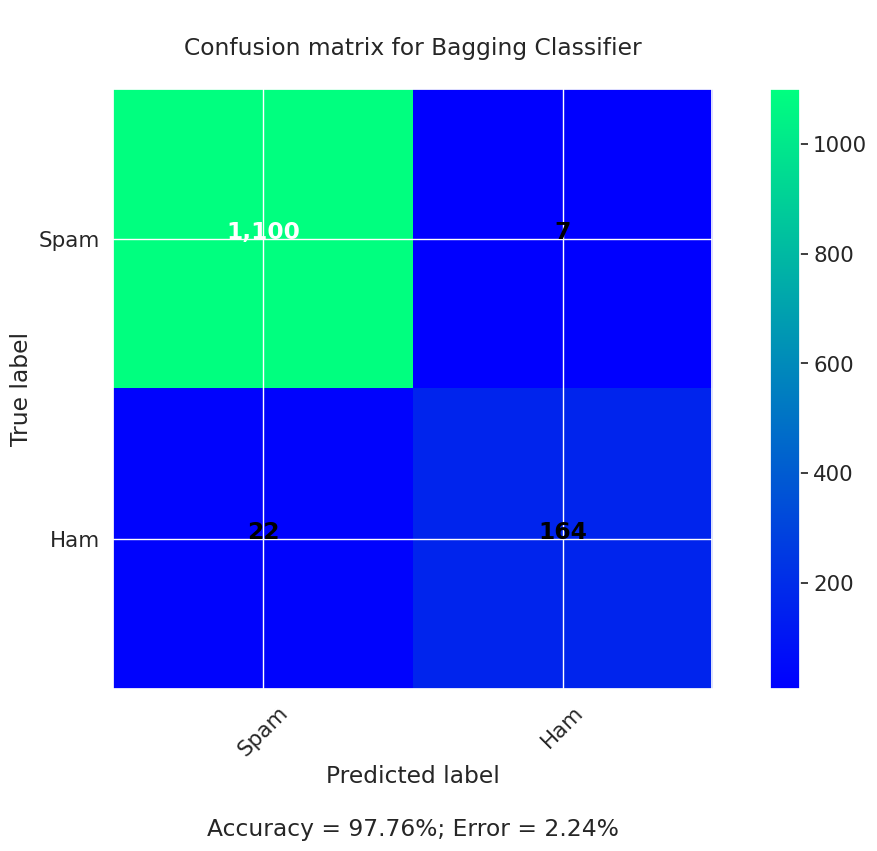

In [28]:
print("\t\tStage VIII. Bagging Classifier + something else\n")
class_BC = BaggingClassifier(class_SVC).fit(X_train, y_train)
y_pred_BC = class_BC.predict(X_test)
print('The first two predicted labels:', y_pred_BC[0], y_pred_BC[1], '\n')
conf_m_BC = confusion_matrix(y_test, y_pred_BC)
class_rep_BC = classification_report(y_test, y_pred_BC)
print('\t\t\tClassification report:\n\n', class_rep_BC, '\n')
plot_conf_matr(conf_m_BC, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for Bagging Classifier')

Double-click **here** for the solution.

<!--
class_BC = BaggingClassifier(class_SVC).fit(X_train, y_train)
# OR
class_BC = BaggingClassifier(class_DTC).fit(X_train, y_train)
# OR
class_BC = BaggingClassifier(class_KNC).fit(X_train, y_train)
-->


Moreover, as you can see, the `Bugging Classifier` can work with some different classifiers as with basic ones, such as `SVC`, `KNC`, `DTC`, etc. In this case, the main purpose of its usage is to increase the accuracy obtained earlier from the basic classifier. You can check this fact comparing, for instance, the obtained earlier `SVC classifier` accuracy and the accuracy after using `Bugging Classifier` with `SVC`.


## Part B. Advanced Deep Learning for SPAM classification task


### I stage. Preliminary actions. Preparing of needed sets.


We need to prepare our sets to the new DL model for SPAM classification task, such as training, validation & test sets based on the primary `df_spam` set. We need a training set for training a pre-built model, a validation set is used for finding better hyperparameters, a test set will be used for checking our trained model on data which the model didn't see.

Firstly, the primary `df_spam` set will split into sentences (messages) and labels separately. Then we will split the full primary `df_spam` set with the following proportions: a training set (`75%`), a validation set (`20%`) and a test set (`5%`). Thus we will obtain 6 sets: three for sentences and three for labels with the same proportions.

Nevertheless, you can change those proportions in percentages as you see it. However, you should remember that these changes can influence your model accuracy, and as it often happens, they decrease it.


In [29]:
print("Stage I. Preliminary actions. Preparing of needed sets\n")

sentences_new_set = []
labels_new_set = []
for i in range(0, df_spam.shape[0], 1):
    sentences_new_set.append(df_spam['message'][i])
    labels_new_set.append(df_spam['feature'][i])

Stage I. Preliminary actions. Preparing of needed sets



In [30]:
train_size = int(df_spam.shape[0] * (1 - test_size - valid_size))
valid_bound = int(df_spam.shape[0] * (1 - valid_size))

train_sentences = sentences_new_set[0 : train_size]
valid_sentences = sentences_new_set[train_size : valid_bound]
test_sentences = sentences_new_set[valid_bound : ]

train_labels_str = labels_new_set[0 : train_size]
valid_labels_str = labels_new_set[train_size : valid_bound]
test_labels_str = labels_new_set[valid_bound : ]

### II stage. Labels transformations.


Secondly, we will replace all the labels (with the following values: `ham` and `spam`) to the appropriate values `1` and `0`, and transform them to Numpy arrays.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [32]:
print("Stage II. Labels transformations\n")

train_labels = [0] * len(train_labels_str)
for ind, item in enumerate(train_labels_str):
    if item == 'ham':
        train_labels[ind] = 1
    else:
        train_labels[ind] = 0

valid_labels = [0] * len(valid_labels_str)
for ind, item in enumerate(valid_labels_str):
    if item == 'ham':
        valid_labels[ind] = 1
    else:
        valid_labels[ind] = 0

test_labels = [0] * len(test_labels_str)
for ind, item in enumerate(test_labels_str):
    if item == 'ham':
        test_labels[ind] = 1
    else:
        test_labels[ind] = 0

train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)
test_labels = np.array(test_labels)

Stage II. Labels transformations



Double-click **here** for the solution.

<!--
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)
test_labels = np.array(test_labels)
-->


### III stage. Tokenization.


[Tokenization](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01) is a process of splitting up a large body of text into smaller lines or words. It helps in interpreting the meaning of the text by analyzing the sequence of the words. We converted our output feature into a numerical form, then, what about the input feature based on `size_vocabulary`.

First, let’s tokenize our data and convert it into a numerical sequence using `Keras` `Tokenizer`. We can also find the index number `word_index` of the corresponding words. We will need a really big word index to handle sentences that are not in the training set. This can be handled using the `Out Of Vocabulary` <OOV> token variable `oov_token`.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [33]:
print("Stage III. Tokenization\n")

tokenizer = Tokenizer(num_words = size_vocabulary,
                      oov_token = oov_token,
                      lower = False)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

Stage III. Tokenization



Double-click **here** for the solution.

<!--
tokenizer = Tokenizer(num_words = size_vocabulary,
                      oov_token = oov_token,
                      lower = False)
-->


As you can see in `text_to_sequence`, all the sequences are of different lengths which are not compatible for the model to train. So we should make all the sentences length equal. For this, we are padding the sequences with `padding_type`.


In [34]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
size_voc = len(word_index) + 1
max_len = max([len(i) for i in train_sequences])
train_set = pad_sequences(train_sequences,
                                padding = padding_type,
                                maxlen = max_len,
                                truncating = trunc_type)

valid_sequences = tokenizer.texts_to_sequences(valid_sentences)
valid_set = pad_sequences(valid_sequences,
                               padding = padding_type,
                               maxlen = max_len,
                               truncating = trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_set = pad_sequences(test_sequences,
                               padding = padding_type,
                               maxlen = max_len,
                               truncating = trunc_type)

### IV stage. Model building.


You should create your own model at this stage.

The first layer of the model is `Embedding` layer, which can be used to create `dense` encoding of words based on an input `size_voc` of defined vocabulary (in our case it's the index number `word_index` of the corresponding words `+ 1`). Typically sparse and dense word encodings denote coding efficiency.

Further, we use one (you can change this number) pair of layers: `Dense` & `Dropout`. You can choose a number of layers pairs yourself.

Using `bidirectional LSTM` will run your input in two ways: one from the past to the future and one from the future to the past (in a back way). This distinguishes this approach from `unidirectional LSTM` which works in the opposite direction, so you save information from the future. Thus, by using the two hidden states together, you can save information from both the past and the future at any time.

`Dropout` [layer](https://arxiv.org/abs/1207.0580?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01) is used in neural networks to solve the problem of overfitting. Networks for training are obtained by dropping out neurons with probability `p`, so the probability that a neuron will remain in the network is `1 - p`.

`Dense` layer is an ordinary tightly bonded layer of a neural network where each neuron is connected to all inputs.


In [35]:
print("Stage IV. Model building\n")

model = Sequential([
    Embedding(size_voc, embedding_dimension, input_length = max_len),
    Bidirectional(LSTM(100)),
    Dropout(drop_level),
    Dense(20, activation = 'relu'),
    Dropout(drop_level),
    Dense(1, activation = 'sigmoid')
])

Stage IV. Model building



### V stage. Model compiling & fitting.


This stage allows you to train your model, but firstly, you should set some hyperparameters & other variables values, such as `batch size`, number of `epochs` for training, types of `optimizer` & `loss` function. You can change all or a part of them during your research.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [36]:
print("Stage V. Model compiling & fitting\n")
optim = Adam(learning_rate = 0.0001)

model.compile(loss = 'binary_crossentropy',
              optimizer = optim,
              metrics = ['accuracy'])
model.summary()

Stage V. Model compiling & fitting

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 189, 64)           606080    
                                                                 
 bidirectional (Bidirection  (None, 200)               132000    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 20)                4020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                    

Double-click **here** for the solution.

<!--
model.compile(loss = 'binary_crossentropy',
              optimizer = optim,
              metrics = ['accuracy'])
model.summary()
-->


In [37]:
history = model.fit(train_set,
                    train_labels,
                    epochs = num_epochs,
                    validation_data = (valid_set, valid_labels),
                    workers = os.cpu_count(),
                    use_multiprocessing = True,
                    verbose = 1)

Epoch 1/20
122/122 [==============================] - 22s 120ms/step - loss: 0.4926 - accuracy: 0.8424 - val_loss: 0.3208 - val_accuracy: 0.8803
Epoch 2/20
122/122 [==============================] - 6s 46ms/step - loss: 0.2759 - accuracy: 0.8749 - val_loss: 0.2576 - val_accuracy: 0.8764
Epoch 3/20
122/122 [==============================] - 5s 37ms/step - loss: 0.2093 - accuracy: 0.9303 - val_loss: 0.1993 - val_accuracy: 0.9266
Epoch 4/20
122/122 [==============================] - 3s 27ms/step - loss: 0.1595 - accuracy: 0.9574 - val_loss: 0.1863 - val_accuracy: 0.9344
Epoch 5/20
122/122 [==============================] - 3s 23ms/step - loss: 0.1150 - accuracy: 0.9706 - val_loss: 0.1097 - val_accuracy: 0.9614
Epoch 6/20
122/122 [==============================] - 3s 23ms/step - loss: 0.0841 - accuracy: 0.9757 - val_loss: 0.0767 - val_accuracy: 0.9768
Epoch 7/20
122/122 [==============================] - 4s 31ms/step - loss: 0.0802 - accuracy: 0.9783 - val_loss: 0.0800 - val_accuracy: 0.97

### VI stage. Results visualization.


You see the results of training for the loss & accuracy.

Replace `##YOUR CODE GOES HERE##` with your Python code.


Stage VI. Results visualization



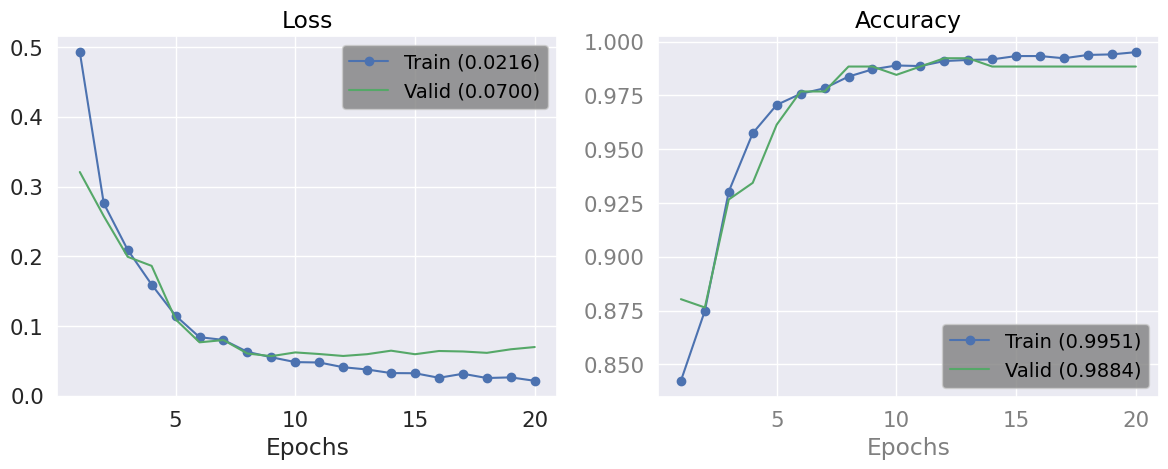

In [39]:
print("Stage VI. Results visualization\n")
plot_history(history)

Double-click **here** for the solution.

<!--
plot_history(history)
-->


If you can see the values reduction for the `loss` distribution, and if you see the values increase for the `accuracy`, then it's a good sign. It means your model training goes in the right direction.

Thus, the main goal has been reached.

In addition, let's estimate your pre-built model on the test set which this model hasn't seen in any case.


In [40]:
model_score = model.evaluate(test_set, test_labels, batch_size = embedding_dimension, verbose = 1)
print(f"Test accuracy: {model_score[1] * 100:0.2f}% \t\t Test error: {model_score[0]:0.4f}")

17/17 [==============================] - 0s 14ms/step - loss: 0.0667 - accuracy: 0.9836
Test accuracy: 98.36% 		 Test error: 0.0667


### VII stage. Model saving & predict checking.


We can save our model and tokenizer for future uses in different formats. We have to do two more steps: to save our trained model so that we can use it in the further research. In addition, we should check our saved model and try to make a forecast.

You should enter any name of your model for saving but make sure that it is in quotes.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [43]:
M_name = "My_model"
pickle.dump(tokenizer, open(M_name + ".pkl", "wb"))
filepath = M_name + '.h5'
tf.keras.models.save_model(model, filepath, include_optimizer = True, save_format = 'h5', overwrite = True)
print("Size of the saved model :", os.stat(filepath).st_size, "bytes")

Size of the saved model : 8963024 bytes


Double-click **here** for the solution.

<!--
M_name = "My_model"
-->


Let's find a set of predictions based on our model. We will enter the `threshold` value (`0.5`) which will help us to mark correctly and incorrectly predicted labels. In addition, we will build a `classification report` (as for the previous studied ML models - see `Part A`) and draw the `confusion matrix`.


33/33 [==============================] - 0s 10ms/step
			Classification report:

               precision    recall  f1-score   support

           0       0.94      0.91      0.93       117
           1       0.99      0.99      0.99       917

    accuracy                           0.98      1034
   macro avg       0.96      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034
 



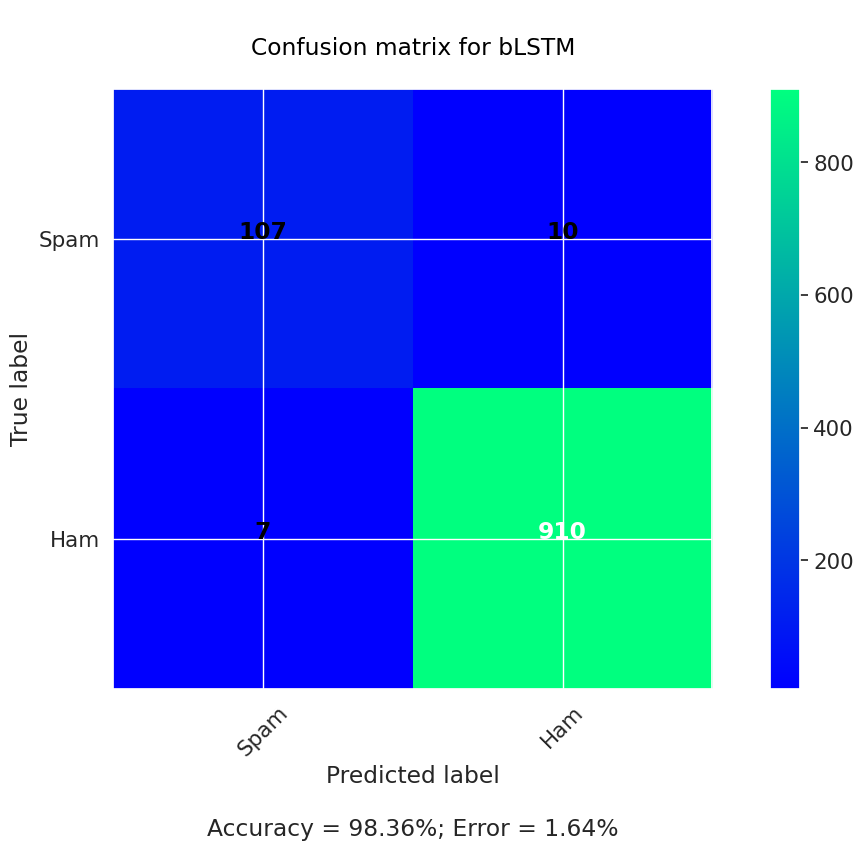

In [44]:
y_pred_bLSTM = model.predict(test_set)

y_prediction = [0] * y_pred_bLSTM.shape[0]
for ind, item in enumerate(y_pred_bLSTM):
    if item > threshold:
        y_prediction[ind] = 1
    else:
        y_prediction[ind] = 0

conf_m_bLSTM = confusion_matrix(test_labels, y_prediction)
class_rep_bLSTM = classification_report(test_labels, y_prediction)
print('\t\t\tClassification report:\n\n', class_rep_bLSTM, '\n')
plot_conf_matr(conf_m_bLSTM, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for bLSTM')

Let's check our trained model on the real messages which you can create yourself.


In [45]:
# You can change this message (as any short sentence) yourself
message_example = ["Darling, please give me a cup of tea"]

message_example_tp = pad_sequences(tokenizer.texts_to_sequences(message_example),
                                   maxlen = max_len,
                                   padding = padding_type,
                                   truncating = trunc_type)

pred = float(model.predict(message_example_tp))
if (pred > threshold):
    print ("This message is a real text")
else:
    print("This message is a spam message")

1/1 [==============================] - 0s 48ms/step
This message is a real text


Through this article, you will be able to understand and create a text classification model using LSTM architecture. In future articles, we will see other text classification techniques and other Natural Langauge Processing models.

Moreover, you have learnt both the Machine Learning (ML) and Deep Learning (DL) models to solve the SPAM classification task.
